In [1]:
#Amazon Sale Report dataset loading and cleaning

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
amz = pd.read_csv(r'C:\Users\Swati\OneDrive\Desktop\Swati\Winter Term\Python-project related\Dataset\Amazon Sale Report.csv')

In [4]:
amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
amz.set_index('index', inplace= True)

In [6]:
import missingno as msno

<AxesSubplot:>

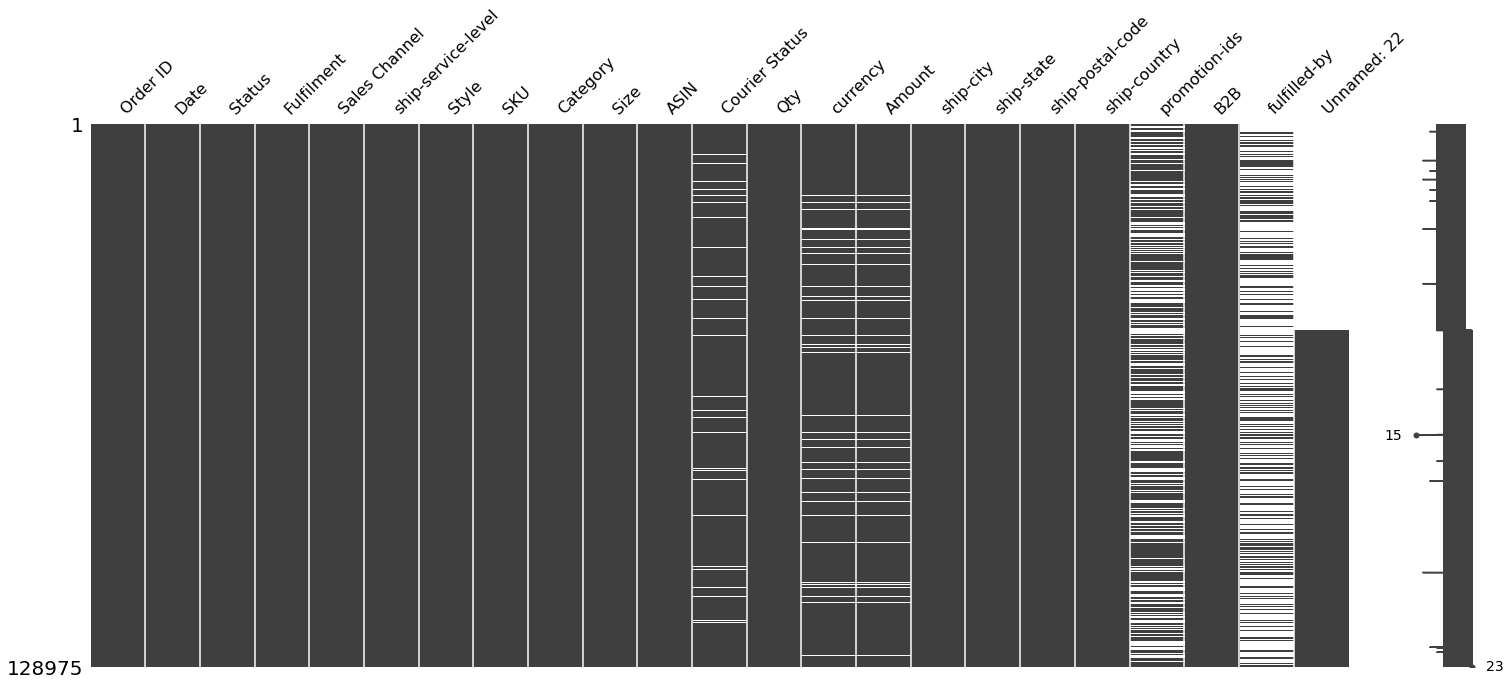

In [7]:
msno.matrix(amz)

<AxesSubplot:>

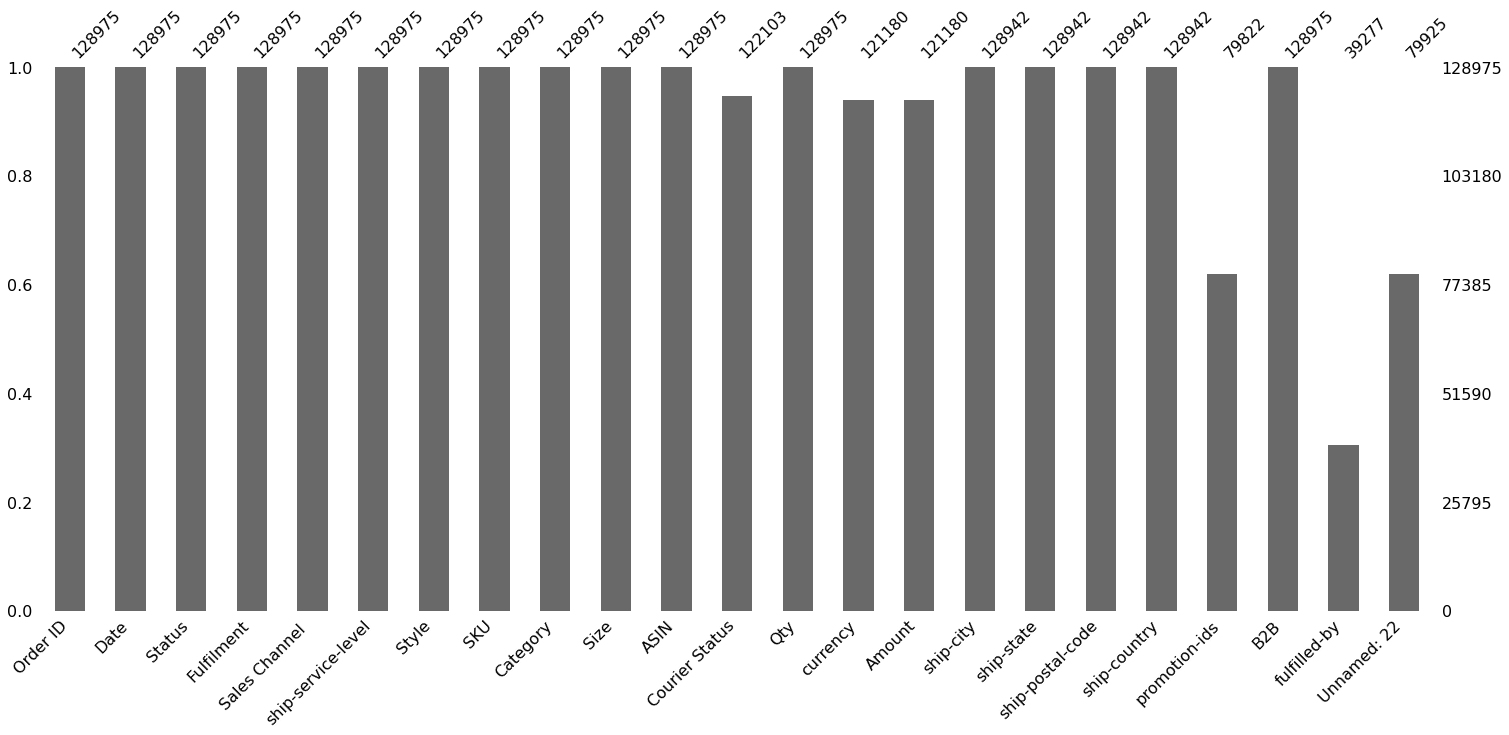

In [8]:
msno.bar(amz)

In [9]:
amz.nunique()# checking for unique values

Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
Qty                       10
currency                   1
Amount                  1410
ship-city               8955
ship-state                69
ship-postal-code        9459
ship-country               1
promotion-ids           5787
B2B                        2
fulfilled-by               1
Unnamed: 22                1
dtype: int64

In [10]:
amz.apply(pd.unique)

Order ID              [405-8078784-5731545, 171-9198151-1101146, 404...
Date                  [04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26...
Status                [Cancelled, Shipped - Delivered to Buyer, Ship...
Fulfilment                                           [Merchant, Amazon]
Sales Channel                                   [Amazon.in, Non-Amazon]
ship-service-level                                [Standard, Expedited]
Style                 [SET389, JNE3781, JNE3371, J0341, JNE3671, SET...
SKU                   [SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...
Category              [Set, kurta, Western Dress, Top, Ethnic Dress,...
Size                   [S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]
ASIN                  [B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7...
Courier Status                     [nan, Shipped, Cancelled, Unshipped]
Qty                                    [0, 1, 2, 15, 3, 9, 13, 5, 4, 8]
currency                                                     [IN

In [11]:
amz.drop(columns=['fulfilled-by','Unnamed: 22','ship-country'],inplace= True)

In [12]:
amz.drop(columns=['currency'],inplace=True)

In [13]:
rem_duplicates = len(amz)

In [14]:
rem_duplicates

128975

In [15]:
amz.drop_duplicates(inplace=True)

In [16]:
after_dups=len(amz)

In [17]:
after_dups

128969

In [18]:
amz[amz.isnull().any(axis=1)]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,Shipped,1,363.00,Chennai,TAMIL NADU,600041.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128966,406-9812666-2474761,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET224,SET224-KR-NP-XS,Set,XS,B08MXDBRK1,Shipped,1,1132.00,CHENNAI 600042,TAMIL NADU,600042.0,NaN,False
128967,404-5182288-1653947,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3638,JNE3638-KR-XS,kurta,XS,B09814Q3QH,Cancelled,0,NaN,Kolkata,WEST BENGAL,700040.0,NaN,False
128969,404-3802633-7250760,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,SET044,SET044-KR-NP-M,Set,M,B07Q2RTSFB,Unshipped,1,612.00,MUMBAI,MAHARASHTRA,400017.0,NaN,False


In [19]:
amz[amz['Order ID'].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,


In [20]:
amz

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,NaN,False
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049.0,NaN,False


In [21]:
amz[amz['Courier Status'].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
23,404-6019946-2909948,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET291,SET291-KR-PP-M,Set,M,B099NK55YG,NaN,0,570.48,pune,MAHARASHTRA,411044.0,NaN,False
29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,3XL,B07JG3CND8,NaN,0,NaN,GUWAHATI,ASSAM,781003.0,NaN,False
83,404-6522553-9345930,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET377,SET377-KR-NP-M,Set,M,B09TZV23QS,NaN,0,1105.36,DEHRADUN,UTTARAKHAND,248001.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128762,402-4651401-6366769,06-01-22,Cancelled,Merchant,Amazon.in,Standard,J0184,J0184-KR-A-S,kurta,S,B08V151HB2,NaN,0,385.71,BENGALURU,KARNATAKA,560043.0,NaN,False
128808,408-4182027-2307535,06-01-22,Cancelled,Merchant,Amazon.in,Standard,JNE3619,JNE3619-KR-S,kurta,S,B091Q8JXX9,NaN,0,NaN,BENGALURU,KARNATAKA,560092.0,NaN,False
128855,402-1958677-2521967,06-01-22,Cancelled,Merchant,Amazon.in,Standard,JNE3568,JNE3568-KR-M,kurta,M,B08KRZRSCL,NaN,0,NaN,Cherukunnu (p.o),KERALA,670301.0,NaN,False


In [22]:
amz['Courier Status']

index
0             NaN
1         Shipped
2         Shipped
3             NaN
4         Shipped
           ...   
128970    Shipped
128971    Shipped
128972    Shipped
128973    Shipped
128974    Shipped
Name: Courier Status, Length: 128969, dtype: object

In [23]:
amz['Courier Status'].fillna('No details', inplace=True)

In [24]:
amz['promotion-ids']

index
0                                                       NaN
1         Amazon PLCC Free-Financing Universal Merchant ...
2              IN Core Free Shipping 2015/04/08 23-48-5-108
3                                                       NaN
4                                                       NaN
                                ...                        
128970                                                  NaN
128971         IN Core Free Shipping 2015/04/08 23-48-5-108
128972                                                  NaN
128973         IN Core Free Shipping 2015/04/08 23-48-5-108
128974         IN Core Free Shipping 2015/04/08 23-48-5-108
Name: promotion-ids, Length: 128969, dtype: object

In [25]:
amz[amz['promotion-ids'].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,No details,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,No details,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,Shipped,1,363.00,Chennai,TAMIL NADU,600041.0,NaN,False
10,407-5633625-6970741,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3160,JNE3160-KR-G-S,kurta,S,B07K3YQLF1,Shipped,1,685.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128966,406-9812666-2474761,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET224,SET224-KR-NP-XS,Set,XS,B08MXDBRK1,Shipped,1,1132.00,CHENNAI 600042,TAMIL NADU,600042.0,NaN,False
128967,404-5182288-1653947,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3638,JNE3638-KR-XS,kurta,XS,B09814Q3QH,Cancelled,0,NaN,Kolkata,WEST BENGAL,700040.0,NaN,False
128969,404-3802633-7250760,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,SET044,SET044-KR-NP-M,Set,M,B07Q2RTSFB,Unshipped,1,612.00,MUMBAI,MAHARASHTRA,400017.0,NaN,False


In [26]:
amz['promotion-ids'].fillna('No Promotion ID',inplace=True)

In [27]:
amz['promotion-ids']

index
0                                           No Promotion ID
1         Amazon PLCC Free-Financing Universal Merchant ...
2              IN Core Free Shipping 2015/04/08 23-48-5-108
3                                           No Promotion ID
4                                           No Promotion ID
                                ...                        
128970                                      No Promotion ID
128971         IN Core Free Shipping 2015/04/08 23-48-5-108
128972                                      No Promotion ID
128973         IN Core Free Shipping 2015/04/08 23-48-5-108
128974         IN Core Free Shipping 2015/04/08 23-48-5-108
Name: promotion-ids, Length: 128969, dtype: object

In [28]:
amz

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,No details,0,647.62,MUMBAI,MAHARASHTRA,400081.0,No Promotion ID,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,No details,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion ID,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,No Promotion ID,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,No Promotion ID,False
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049.0,No Promotion ID,False


In [29]:
amz['Amount']

index
0          647.62
1          406.00
2          329.00
3          753.33
4          574.00
           ...   
128970     517.00
128971     999.00
128972     690.00
128973    1199.00
128974     696.00
Name: Amount, Length: 128969, dtype: float64

In [30]:
amz[amz['Amount'].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,3XL,B07JG3CND8,No details,0,NaN,GUWAHATI,ASSAM,781003.0,No Promotion ID,False
65,171-4137548-0481151,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3373,JNE3373-KR-XXL,kurta,XXL,B082W8RWN1,Cancelled,0,NaN,Dahod,Gujarat,389151.0,No Promotion ID,False
84,403-9950518-0349133,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Cancelled,0,NaN,HYDERABAD,TELANGANA,500072.0,No Promotion ID,False
95,405-9112089-3379536,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-L,kurta,L,B081WSCKPQ,Cancelled,0,NaN,PUNE,MAHARASHTRA,411046.0,No Promotion ID,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128903,406-3923120-4345139,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3801,JNE3801-KR-M,kurta,M,B09SDZ4FH9,Cancelled,0,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,No Promotion ID,False
128907,403-6757403-6097100,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,NW014,NW014-ST-SR-XXXL,Set,3XL,B0928ZT74Y,Cancelled,0,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,No Promotion ID,False
128908,403-6757403-6097100,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,NW007,NW007-ST-CP-XXXL,Set,3XL,B0928YCMQP,Cancelled,0,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,No Promotion ID,False


In [31]:
amz['Amount'].fillna('0',inplace=True)

In [32]:
amz[amz['SKU'].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,


In [33]:
amz[amz['ASIN'].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,


In [34]:
amz[amz['ship-postal-code'].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,
1871,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,L,B099S6795L,Shipped,1,493.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
1872,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,L,B09811Y7WM,Shipped,1,458.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
8752,406-4003386-8768363,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,kurta,M,B082W7HW86,Shipped,1,432.0,NaN,NaN,NaN,No Promotion ID,False
11215,402-0107720-7057168,04-23-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
13252,407-4532637-8415521,04-22-22,Cancelled,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,No details,0,380.0,NaN,NaN,NaN,No Promotion ID,False
15688,404-9229894-8608305,04-21-22,Shipped,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Shipped,1,442.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
16787,402-4919636-4333150,04-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,3XL,B07GPGP46N,Shipped,1,376.0,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False
18351,405-4927647-8064368,04-19-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XS,Set,XS,B08XNHXSFZ,Shipped,1,1112.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
22930,402-8628677-0457954,04-16-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.0,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False


In [35]:
amz['ship-postal-code'].fillna('postal code NA',inplace=True)

In [36]:
amz[amz['ship-city'].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,
1871,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,L,B099S6795L,Shipped,1,493.0,NaN,NaN,postal code NA,IN Core Free Shipping 2015/04/08 23-48-5-108,False
1872,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,L,B09811Y7WM,Shipped,1,458.0,NaN,NaN,postal code NA,IN Core Free Shipping 2015/04/08 23-48-5-108,False
8752,406-4003386-8768363,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,kurta,M,B082W7HW86,Shipped,1,432.0,NaN,NaN,postal code NA,No Promotion ID,False
11215,402-0107720-7057168,04-23-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.0,NaN,NaN,postal code NA,IN Core Free Shipping 2015/04/08 23-48-5-108,False
13252,407-4532637-8415521,04-22-22,Cancelled,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,No details,0,380.0,NaN,NaN,postal code NA,No Promotion ID,False
15688,404-9229894-8608305,04-21-22,Shipped,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Shipped,1,442.0,NaN,NaN,postal code NA,IN Core Free Shipping 2015/04/08 23-48-5-108,False
16787,402-4919636-4333150,04-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,3XL,B07GPGP46N,Shipped,1,376.0,NaN,NaN,postal code NA,Amazon PLCC Free-Financing Universal Merchant ...,False
18351,405-4927647-8064368,04-19-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XS,Set,XS,B08XNHXSFZ,Shipped,1,1112.0,NaN,NaN,postal code NA,IN Core Free Shipping 2015/04/08 23-48-5-108,False
22930,402-8628677-0457954,04-16-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.0,NaN,NaN,postal code NA,Amazon PLCC Free-Financing Universal Merchant ...,False


In [37]:
amz['ship-city'].fillna('unknown city',inplace=True)

In [38]:
amz

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,No details,0,647.62,MUMBAI,MAHARASHTRA,400081.0,No Promotion ID,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,No details,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion ID,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.0,CHENNAI,TAMIL NADU,600073.0,No Promotion ID,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.0,HYDERABAD,TELANGANA,500013.0,No Promotion ID,False
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.0,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.0,HYDERABAD,TELANGANA,500049.0,No Promotion ID,False


In [39]:
amz[amz['ship-state'].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,
1871,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,L,B099S6795L,Shipped,1,493.0,unknown city,NaN,postal code NA,IN Core Free Shipping 2015/04/08 23-48-5-108,False
1872,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,L,B09811Y7WM,Shipped,1,458.0,unknown city,NaN,postal code NA,IN Core Free Shipping 2015/04/08 23-48-5-108,False
8752,406-4003386-8768363,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,kurta,M,B082W7HW86,Shipped,1,432.0,unknown city,NaN,postal code NA,No Promotion ID,False
11215,402-0107720-7057168,04-23-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.0,unknown city,NaN,postal code NA,IN Core Free Shipping 2015/04/08 23-48-5-108,False
13252,407-4532637-8415521,04-22-22,Cancelled,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,No details,0,380.0,unknown city,NaN,postal code NA,No Promotion ID,False
15688,404-9229894-8608305,04-21-22,Shipped,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Shipped,1,442.0,unknown city,NaN,postal code NA,IN Core Free Shipping 2015/04/08 23-48-5-108,False
16787,402-4919636-4333150,04-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,3XL,B07GPGP46N,Shipped,1,376.0,unknown city,NaN,postal code NA,Amazon PLCC Free-Financing Universal Merchant ...,False
18351,405-4927647-8064368,04-19-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XS,Set,XS,B08XNHXSFZ,Shipped,1,1112.0,unknown city,NaN,postal code NA,IN Core Free Shipping 2015/04/08 23-48-5-108,False
22930,402-8628677-0457954,04-16-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.0,unknown city,NaN,postal code NA,Amazon PLCC Free-Financing Universal Merchant ...,False


In [40]:
amz['ship-state'].fillna('Unknown',inplace=True)

In [41]:
amz

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,No details,0,647.62,MUMBAI,MAHARASHTRA,400081.0,No Promotion ID,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,No details,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion ID,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.0,CHENNAI,TAMIL NADU,600073.0,No Promotion ID,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.0,HYDERABAD,TELANGANA,500013.0,No Promotion ID,False
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.0,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.0,HYDERABAD,TELANGANA,500049.0,No Promotion ID,False


<AxesSubplot:>

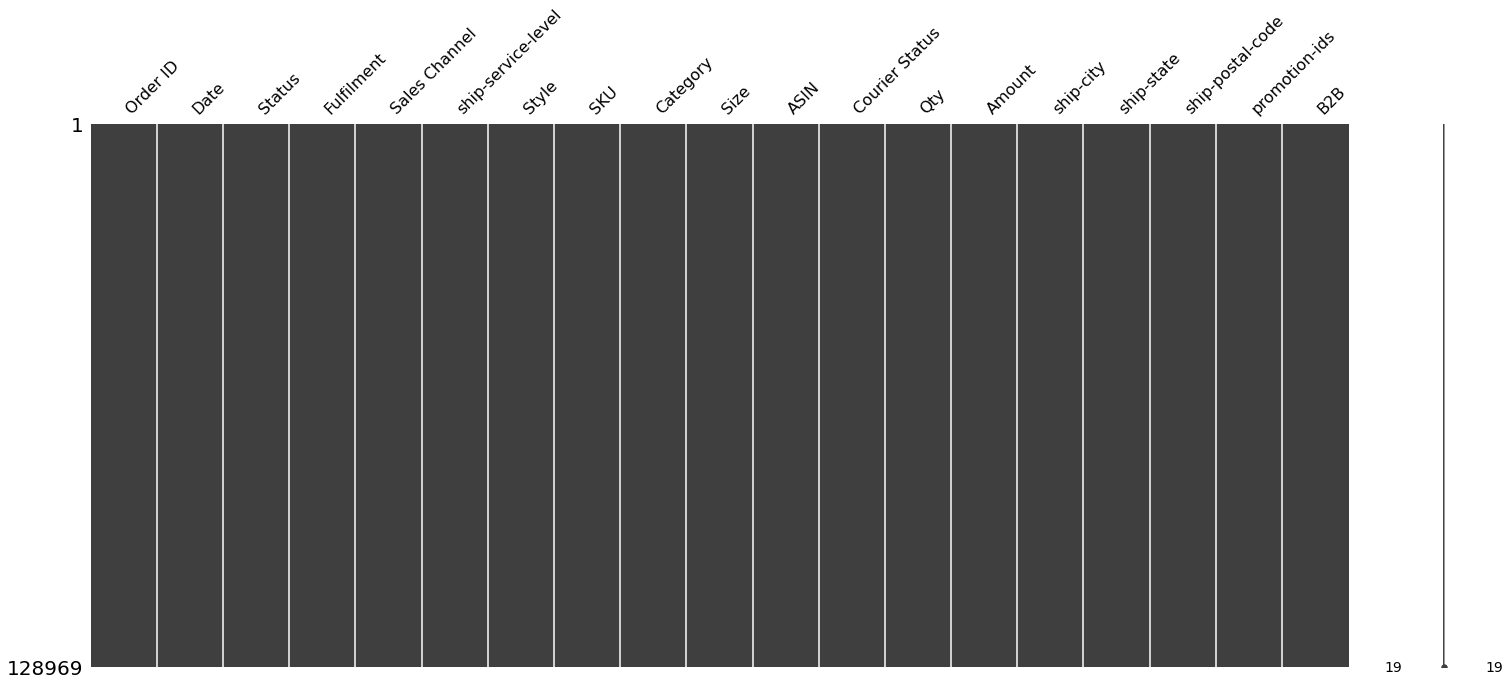

In [42]:
msno.matrix(amz)

In [43]:
mapper = {'Order ID':'orderID', 'Date':'date', 'Status':'shipStatus','Fullfilment':'OrderFullfilment', 'ship-service-level':'serviceLevel', 'Style':'style', 'SKU':'sku', 'Category':'productCategory', 'Size':'size', 'ASIN':'asin', 'Courier Status':'courierShipStatus', 'Qty':'orderQuantity', 'Amount':'orderAmount (INR)', 'ship-city':'city', 'ship-state':'state', 'ship-postal-code':'zip', 'promotion-ids':'promotion','B2B':'customerType' }
amz.rename(columns = mapper, inplace = True)
amz.head()

,orderID,date,shipStatus,Fulfilment,Sales Channel,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,No details,0,647.62,MUMBAI,MAHARASHTRA,400081.0,No Promotion ID,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,No details,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion ID,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.0,CHENNAI,TAMIL NADU,600073.0,No Promotion ID,False


In [44]:
amz['customerType'].replace([True,False],['business','consumer'],inplace=True)
amz.head()

,orderID,date,shipStatus,Fulfilment,Sales Channel,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,No details,0,647.62,MUMBAI,MAHARASHTRA,400081.0,No Promotion ID,consumer
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,consumer
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,No details,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion ID,consumer
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.0,CHENNAI,TAMIL NADU,600073.0,No Promotion ID,consumer


In [45]:
amz['city'].replace(['postal code NA'],['unknown city'],inplace=True)

In [46]:
amz['city']

index
0              MUMBAI
1           BENGALURU
2         NAVI MUMBAI
3          PUDUCHERRY
4             CHENNAI
             ...     
128970      HYDERABAD
128971       GURUGRAM
128972      HYDERABAD
128973          Halol
128974         Raipur
Name: city, Length: 128969, dtype: object

In [47]:
amz

,orderID,date,shipStatus,Fulfilment,Sales Channel,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,No details,0,647.62,MUMBAI,MAHARASHTRA,400081.0,No Promotion ID,consumer
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,consumer
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,No details,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion ID,consumer
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.0,CHENNAI,TAMIL NADU,600073.0,No Promotion ID,consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.0,HYDERABAD,TELANGANA,500013.0,No Promotion ID,consumer
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.0,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,consumer
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.0,HYDERABAD,TELANGANA,500049.0,No Promotion ID,consumer


In [48]:
amz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128969 entries, 0 to 128974
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   orderID            128969 non-null  object
 1   date               128969 non-null  object
 2   shipStatus         128969 non-null  object
 3   Fulfilment         128969 non-null  object
 4   Sales Channel      128969 non-null  object
 5   serviceLevel       128969 non-null  object
 6   style              128969 non-null  object
 7   sku                128969 non-null  object
 8   productCategory    128969 non-null  object
 9   size               128969 non-null  object
 10  asin               128969 non-null  object
 11  courierShipStatus  128969 non-null  object
 12  orderQuantity      128969 non-null  int64 
 13  orderAmount (INR)  128969 non-null  object
 14  city               128969 non-null  object
 15  state              128969 non-null  object
 16  zip                1

In [49]:
amz['date']=pd.to_datetime(amz['date'])

In [50]:
amz['month']=amz['date'].dt.month
amz['month'].unique()

array([4, 3, 5, 6], dtype=int64)

In [51]:
amz['date'].max()

Timestamp('2022-06-29 00:00:00')

In [52]:
amz['date'].min()

Timestamp('2022-03-31 00:00:00')

In [53]:
months = ['march','April', 'May', 'June']
amz['month'].replace([3,4,5,6],months, inplace = True)

In [54]:
amz.set_index('orderID', inplace = True)
amz

,date,shipStatus,Fulfilment,Sales Channel,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType,month
orderID,,,,,,,,,,,,,,,,,,,
405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,No details,0,647.62,MUMBAI,MAHARASHTRA,400081.0,No Promotion ID,consumer,April
171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,consumer,April
404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business,April
403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,No details,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion ID,consumer,April
407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.0,CHENNAI,TAMIL NADU,600073.0,No Promotion ID,consumer,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.0,HYDERABAD,TELANGANA,500013.0,No Promotion ID,consumer,May
402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.0,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,consumer,May
407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.0,HYDERABAD,TELANGANA,500049.0,No Promotion ID,consumer,May


In [55]:
#Data cleaning for May 2022 data

In [56]:
df = pd.read_csv(r'C:\Users\Swati\OneDrive\Desktop\Swati\Winter Term\Python-project related\Dataset\May-2022.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1330 non-null   int64 
 1   Sku             1330 non-null   object
 2   Style Id        1330 non-null   object
 3   Catalog         1330 non-null   object
 4   Category        1330 non-null   object
 5   Weight          1330 non-null   object
 6   TP              1330 non-null   object
 7   MRP Old         1330 non-null   object
 8   Final MRP Old   1330 non-null   object
 9   Ajio MRP        1330 non-null   object
 10  Amazon MRP      1330 non-null   object
 11  Amazon FBA MRP  1330 non-null   object
 12  Flipkart MRP    1330 non-null   object
 13  Limeroad MRP    1330 non-null   object
 14  Myntra MRP      1330 non-null   object
 15  Paytm MRP       1330 non-null   object
 16  Snapdeal MRP    1330 non-null   object
dtypes: int64(1), object(16)
memory usage: 176.8+ KB


In [58]:
df

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,1325,Os326_M,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1326,1326,Os326_L,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1327,1327,Os326_XL,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1328,1328,Os326_2XL,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995


In [59]:
df[df['index'].isnull()]

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP


In [60]:
df[df['Sku'].isnull()]

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP


In [61]:
df[df['Style Id'].isnull()]

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP


In [62]:
df[df['Catalog'].isnull()]

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP


In [63]:
df[df['Category'].isnull()]

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP


In [64]:
df[df['Weight'].isnull()]

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP


In [65]:
df[df['TP'].isnull()]

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP


In [66]:
df[df['MRP Old'].isnull()]

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP


In [67]:
df[df['Final MRP Old'].isnull()]

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP


In [68]:
df[df['Ajio MRP'].isnull()]

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP


In [69]:
df[df['Amazon MRP'].isnull()]

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP


In [70]:
df[df['Amazon MRP'].isnull()]
df[df['Amazon FBA MRP'].isnull()]
df[df['Flipkart MRP'].isnull()]
df[df['Limeroad MRP'].isnull()]
df[df['Myntra MRP'].isnull()]
df[df['Paytm MRP'].isnull()]
df[df['Snapdeal MRP'].isnull()]

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP


In [71]:
df

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,1325,Os326_M,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1326,1326,Os326_L,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1327,1327,Os326_XL,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1328,1328,Os326_2XL,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995


<AxesSubplot:>

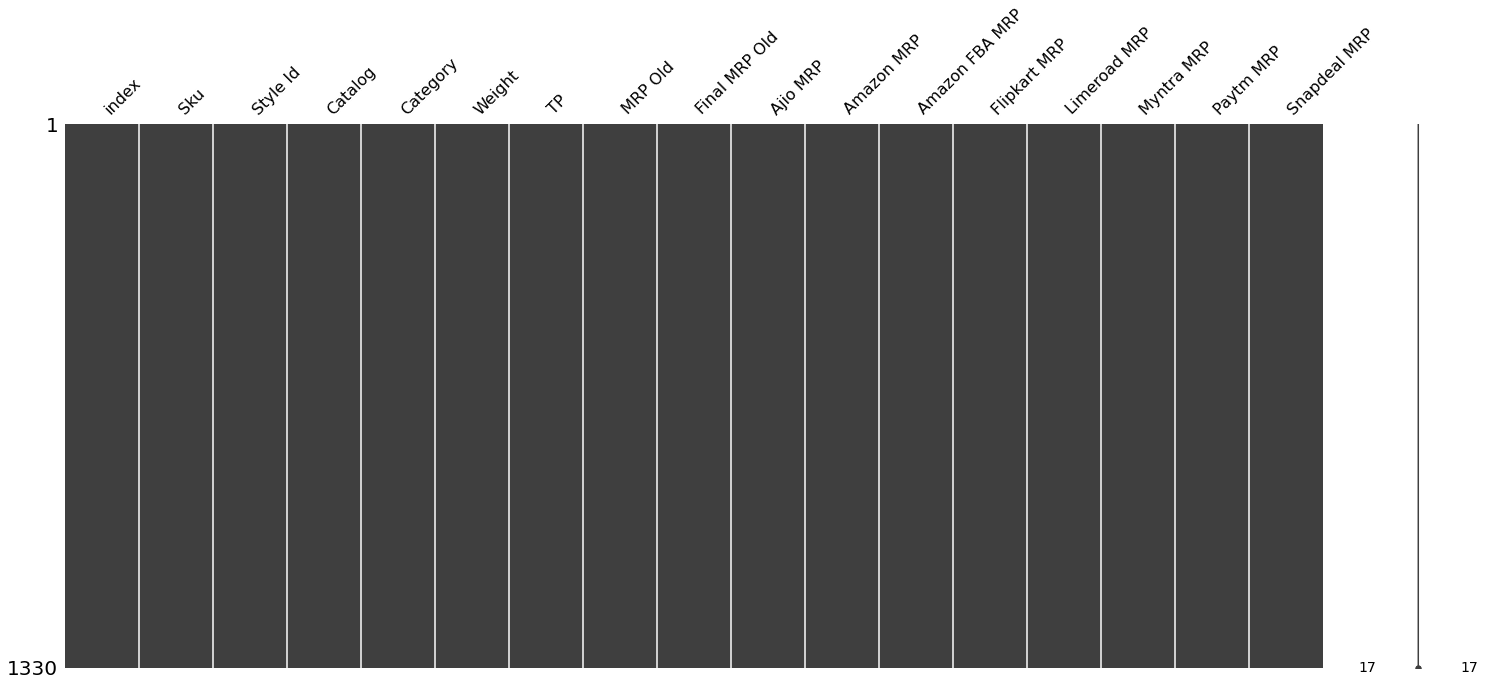

In [72]:
msno.matrix(df)